In [1]:
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Cópia de cursos-prouni.csv - cursos-prouni-2018-tratados.csv.csv')

In [6]:
list_drop_columns = ['grau',
                     'turno',
                     'curso_busca',
                     'curso_id',
                     'bolsa_parcial_ampla',
                     'bolsa_parcial_cotas',
                     'bolsa_integral_ampla',
                     'bolsa_integral_cotas',
                     'mensalidade',
                     'cidade_busca',
                     'uf_busca',
                    'universidade_nome',
                     ]

df_aux = df.drop(columns=list_drop_columns)

In [7]:
df_aux.head()

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82
3,Medicina,741.36,739.90,760.80,715.10
4,Medicina,756.46,737.88,747.14,717.60


ATRIBUTOS:

nome: Nome do curso

nota_integral_ampla: Nota da categoria de bolsa integral de ampla concorrência

nota_integral_cotas: Nota da categoria de bolsa integral com aplicação de cotas

nota_parcial_ampla: Nota da categoria de bolsa parcial de ampla concorrência

nota_parcial_cotas: Nota da categoria de bolsa parcial com aplicação de cotas

Exploração e tratamento dos dados

In [8]:
#alterando nomes das colunas
df_aux.head(2)

,nome,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [9]:
df_aux.rename(columns={'nome': 'nome_do_curso'}, inplace=True)

In [10]:
df_aux.head(3)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26
2,Medicina,741.06,729.02,730.98,722.82


In [11]:
#valores NaN
#RELAÇÃO DA QUANTIDADE
df_aux.isnull().sum()

nome_do_curso          0
nota_integral_ampla    0
nota_integral_cotas    0
nota_parcial_ampla     0
nota_parcial_cotas     0
dtype: int64

In [12]:
#análise dos tipos de atributos
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df_aux.dtypes

nome_do_curso           object
nota_integral_ampla    float64
nota_integral_cotas    float64
nota_parcial_ampla     float64
nota_parcial_cotas     float64
dtype: object

In [13]:
#dados estatísticos
df_aux.describe()

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
count,2203.000000,2203.000000,2203.000000,2203.000000
mean,599.380390,574.097921,547.297204,521.452964
std,53.194117,59.868058,58.971101,56.371352
min,450.000000,450.000000,450.000000,450.000000
25%,569.530000,542.290000,507.260000,450.000000
50%,602.040000,583.320000,555.240000,526.540000
75%,634.550000,614.340000,588.140000,563.600000
max,781.200000,792.240000,776.360000,768.340000


Análise dos Outliers

In [14]:
import plotly.express as px

In [15]:
boxplot = px.box(df_aux, y="nota_integral_ampla")
boxplot.show()

In [16]:
boxplot = px.box(df_aux, y="nota_integral_cotas")
boxplot.show()

In [17]:
boxplot = px.box(df_aux, y="nota_parcial_ampla")
boxplot.show()

In [18]:
boxplot = px.box(df_aux, y="nota_parcial_cotas")
boxplot.show()

Pré-Processamento

In [19]:
df_aux.head(2)

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,Medicina,739.62,738.08,738.96,718.64
1,Medicina,758.32,723.94,734.92,711.26


In [20]:
#excluir nome do curso
df2 = df_aux.drop(labels = 'nome_do_curso', axis = 1)

In [21]:
df2.head(2)

,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas
0,739.62,738.08,738.96,718.64
1,758.32,723.94,734.92,711.26


Escalonamento

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
escala = StandardScaler()
df2_esc = escala.fit_transform(df2)

In [24]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

Agrupamento Hierárquico com PCA

In [25]:
df2_esc

array([[ 2.63697298,  2.73967981,  3.25085185,  3.49879504],
       [ 2.98859543,  2.50344014,  3.18232816,  3.36784775],
       [ 2.66404979,  2.58831267,  3.11550061,  3.57296301],
       ...,
       [-1.91042663, -1.12469332, -0.65839058, -1.23624466],
       [-2.68361995, -2.07332759, -1.65028791, -1.26782816],
       [-1.24177988, -2.07332759, -1.65028791, -1.26782816]])

In [26]:
df2_esc.shape

(2203, 4)

Componentes principais

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components = 2)

In [29]:
df2_pca = pca.fit_transform(df2_esc)

In [30]:
df2_pca

array([[ 6.0642945 , -0.66716556],
       [ 6.02300941, -0.53037405],
       [ 5.97211217, -0.7011158 ],
       ...,
       [-2.4658188 , -0.5579454 ],
       [-3.83675733, -0.89844091],
       [-3.11441902, -0.22451096]])

In [31]:
# razão das variáveis explicativas
pca.explained_variance_ratio_

array([0.8102535 , 0.09414325])

In [32]:
# Soma das variáveis explicativas
pca.explained_variance_ratio_.sum()

0.904396749621399

Dendograma

In [33]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

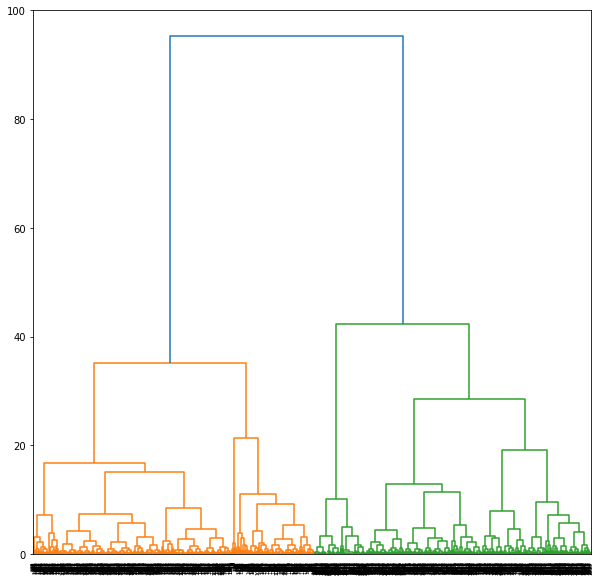

In [34]:
plt.figure(figsize=(10, 10))
dendrograma = dendrogram(linkage(df2_pca, method = 'ward')) #complete, single e ward (dados dispersos)

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage = 'complete')
classificacao = hier.fit_predict(df2_pca)

In [37]:
classificacao

array([2, 2, 2, ..., 0, 0, 0])

In [38]:
import plotly.express as px

In [39]:
graf = px.scatter(x = df2_pca[:,0], y = df2_pca[:,1], color=classificacao)
graf.update_layout(width=800,height=500,title_text='Agrupamento Hierárquico')
graf.show()

Agrupamento

In [40]:
agrupamento = pd.DataFrame(classificacao, columns = ['Grupo'])
agrupamento

,Grupo
0,2
1,2
2,2
3,2
4,2
...,...
2198,0
2199,0
2200,0
2201,0


In [41]:
df_hc = pd.concat([df_aux, agrupamento],axis=1)
df_hc

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,2
1,Medicina,758.32,723.94,734.92,711.26,2
2,Medicina,741.06,729.02,730.98,722.82,2
3,Medicina,741.36,739.90,760.80,715.10,2
4,Medicina,756.46,737.88,747.14,717.60,2
...,...,...,...,...,...,...
2198,Teologia,584.34,450.00,489.28,450.00,0
2199,Teologia,450.00,450.00,450.00,450.00,0
2200,Pedagogia,497.78,506.78,508.48,451.78,0
2201,Gestão da Qualidade,456.66,450.00,450.00,450.00,0


In [42]:
df_hc.loc[df_aux.nome_do_curso == 'Marketing']

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
650,Marketing,570.24,471.30,493.28,450.00,0
741,Marketing,591.30,615.28,524.16,450.00,0
1170,Marketing,588.42,586.98,537.84,475.16,0
1309,Marketing,589.22,583.84,450.00,450.00,0
1394,Marketing,590.18,576.52,539.18,477.26,0
1505,Marketing,626.12,583.14,591.16,549.80,1
1533,Marketing,553.44,539.30,535.06,488.94,0
1543,Marketing,566.26,556.30,517.66,450.00,0
1596,Marketing,598.14,584.88,549.90,510.00,0
1647,Marketing,578.32,526.72,502.76,481.16,0


In [43]:
grupo2 = df_hc.loc[df_hc.Grupo == 2]
grupo2 

,nome_do_curso,nota_integral_ampla,nota_integral_cotas,nota_parcial_ampla,nota_parcial_cotas,Grupo
0,Medicina,739.62,738.08,738.96,718.64,2
1,Medicina,758.32,723.94,734.92,711.26,2
2,Medicina,741.06,729.02,730.98,722.82,2
3,Medicina,741.36,739.90,760.80,715.10,2
4,Medicina,756.46,737.88,747.14,717.60,2
5,Medicina,757.84,738.90,735.76,718.48,2
6,Medicina,735.84,724.70,738.42,723.28,2
7,Medicina,770.50,792.24,750.44,732.46,2
8,Medicina,745.46,746.10,743.14,690.18,2
9,Medicina,754.98,733.60,748.78,727.58,2
